<a href="https://colab.research.google.com/github/cevikhalil/Data-Science-with-Python-and-Tensorflow/blob/main/21_Tensorflow_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

df = pd.read_excel("/content/drive/My Drive/Veri_bilimi_icin_python_ve_tensorflow/maliciousornot.xlsx")
df

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SOURCE_A,SOURCE_B,SOURCE_C,SOURCE_D,SOURCE_F,SOURCE_E,SOURCE_G,SOURCE_H,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,0.101956,1418.390000,1.172665,11125.618000,198.704133,0.008289,0.063523,0.069598,0.020557,0.038899,0.008022,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,0.073407,0.704014,0.950645,4401.542667,95.958293,0.006768,0.016943,0.024093,0.017357,0.017992,0.004575,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,0.077707,0.965801,1.019298,5939.103333,121.800193,0.007966,0.051891,0.049637,0.026658,0.029145,0.005921,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,0.126217,0.641967,1497.405333,4462.423333,35.271927,0.011800,0.096606,0.073329,0.024184,0.077241,0.011927,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,0.076204,0.980826,1.012044,7044.022667,122.331280,0.014883,0.031878,0.073679,0.024417,0.022746,0.006626,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,0.072837,1523.312000,1626.938667,9939.092667,205.569400,0.013342,0.037448,0.067331,0.031787,0.014430,0.005491,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,0.071671,0.991578,3190.406000,6739.619333,128.289813,0.007473,0.031386,0.051166,0.021736,0.024585,0.003236,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,0.073160,0.591190,1392.483333,4436.516667,62.888433,0.007646,0.048329,0.061269,0.020168,0.017072,0.005041,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,0.090881,940.412000,2066.056667,7476.664000,111.683640,0.008448,0.079767,0.092189,0.021554,0.030104,0.008012,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [7]:
df.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SOURCE_A,SOURCE_B,SOURCE_C,SOURCE_D,SOURCE_F,SOURCE_E,SOURCE_G,SOURCE_H,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,1.141613,102.672734,1054.061525,3333.335724,424.041644,0.009134,0.235648,1.549989,0.090850,0.309790,0.019027,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,9.374137,365.368355,1057.620796,2298.396221,2021.142069,0.003906,2.215631,23.059178,1.035261,2.788495,0.331812,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,0.064715,0.144430,0.466579,0.999220,13.056960,0.003455,0.002917,0.000000,0.000000,0.010210,0.001159,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,0.074737,0.304533,1.108708,1927.132167,24.015480,0.006637,0.016901,0.019352,0.010198,0.019436,0.002907,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,0.079767,0.444688,1325.126000,2827.712667,34.255090,0.008242,0.026800,0.033860,0.014313,0.024275,0.004155,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,0.086013,0.764862,1814.114333,4181.336000,66.709667,0.010620,0.042212,0.055091,0.019213,0.030505,0.005840,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,101.036000,3721.492667,5046.618667,12703.334000,12737.012667,0.040324,34.974000,512.952000,15.544000,40.155333,7.772000,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [8]:
df.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

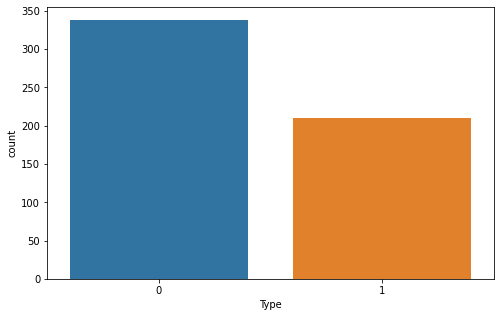

In [9]:
import matplotlib.pyplot as plt
import seaborn as sbn

plt.figure(figsize = (8,5))
sbn.countplot(x = "Type", data = df)

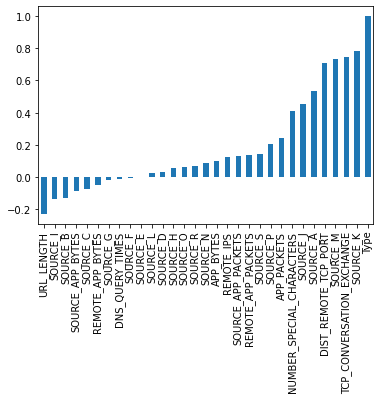

In [10]:
df.corr()["Type"].sort_values().plot(kind="bar")

## Train/Test Split

In [23]:
y = df["Type"].values
x = df.drop("Type",axis=1).values 

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 15)

## Scale

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Tensorflow

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(x = x_train, y = y_train, 
          validation_data = (x_test, y_test),
          epochs = 700,
          verbose = 1)

Epoch 1/700
12/12 [==============================] - 0s 13ms/step - loss: 0.6881 - val_loss: 0.6885
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6699 - val_loss: 0.6784
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6519 - val_loss: 0.6665
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6325 - val_loss: 0.6508
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6092 - val_loss: 0.6303
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5814 - val_loss: 0.6072
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5513 - val_loss: 0.5794
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5196 - val_loss: 0.5482
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4859 - val_loss: 0.5115
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4480 - val_loss: 0.4739
Epoch 11

In [29]:
model.history.history

{'loss': [0.6881070137023926,
  0.6699128150939941,
  0.6519178748130798,
  0.632454514503479,
  0.6092150807380676,
  0.5814460515975952,
  0.5513333678245544,
  0.5195556879043579,
  0.48587122559547424,
  0.4479842185974121,
  0.4078407883644104,
  0.3629642724990845,
  0.31543371081352234,
  0.27589133381843567,
  0.23936302959918976,
  0.21178241074085236,
  0.19058014452457428,
  0.1754457950592041,
  0.17322079837322235,
  0.15368352830410004,
  0.14372263848781586,
  0.14017388224601746,
  0.13662177324295044,
  0.12455926835536957,
  0.12183527648448944,
  0.12159182876348495,
  0.11358284205198288,
  0.11311972141265869,
  0.1044832244515419,
  0.10328797996044159,
  0.1021471917629242,
  0.09726640582084656,
  0.09790875762701035,
  0.09445547312498093,
  0.09184210002422333,
  0.09101315587759018,
  0.08777926862239838,
  0.08577953279018402,
  0.08769845217466354,
  0.08293754607439041,
  0.08262880146503448,
  0.08360935747623444,
  0.07998976856470108,
  0.07776487618684

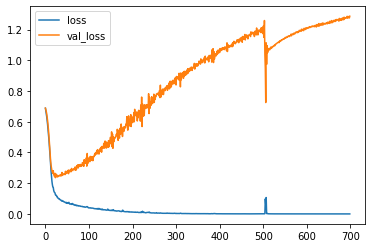

In [32]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

## Early Stopping

In [33]:
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy")

earlyStopping = EarlyStopping(monitor = "val_loss", mode = "min",
                              verbose = 1,patience = 25)
model.fit(x=x_train, y=y_train, epochs = 700, 
          validation_data= (x_test,y_test),
          verbose = 1, callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6717 - val_loss: 0.6762
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6517 - val_loss: 0.6615
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6268 - val_loss: 0.6379
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5977 - val_loss: 0.6081
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5653 - val_loss: 0.5715
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5283 - val_loss: 0.5319
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4875 - val_loss: 0.4925
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4471 - val_loss: 0.4514
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4039 - val_loss: 0.4169
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3644 - val_loss: 0.3754
Epoch 11

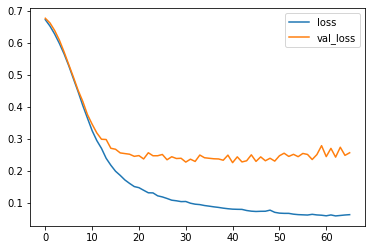

In [34]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

## Dropout

In [37]:
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy")

model.fit(x=x_train, y=y_train, epochs = 700, 
          validation_data= (x_test,y_test),
          verbose = 1, callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 0s 11ms/step - loss: 0.7068 - val_loss: 0.6893
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.7041 - val_loss: 0.6868
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6907 - val_loss: 0.6852
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6866 - val_loss: 0.6845
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6764 - val_loss: 0.6840
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6802 - val_loss: 0.6828
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6703 - val_loss: 0.6812
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6749 - val_loss: 0.6790
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6679 - val_loss: 0.6755
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6607 - val_loss: 0.6710
Epoch 11

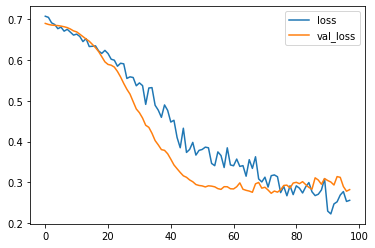

In [38]:
lossDf = pd.DataFrame(model.history.history)
lossDf.plot()

## Predictions & Confusion Matrix

In [40]:
predictions = model.predict_classes(x_test)
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        91
           1       0.86      0.91      0.88        74

    accuracy                           0.89       165
   macro avg       0.89      0.89      0.89       165
weighted avg       0.89      0.89      0.89       165



In [42]:
print(confusion_matrix(y_test, predictions))

[[80 11]
 [ 7 67]]
